In [1]:
import tensorflow as tf
import numpy as np
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x

In [2]:
np.random.seed(0) # consistent data splitting

In [3]:
data = np.load('data_with_labels.npz')

In [4]:
train = data['arr_0']/255.
labels = data['arr_1']

In [5]:
print(train.shape)
print(train[0])
print(labels[0])

(2790, 36, 36)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
0


In [8]:
import matplotlib.pyplot as plt
plt.ion()  # Turn interactive mode on.
f, plts = plt.subplots(5, sharex=True)
c = 91
for i in range(5):
    plts[i].pcolor(train[c + i * 558],
                   cmap=plt.cm.gray_r)

In [6]:
def to_onehot(labels,nclasses = 5):
    '''
    Convert labels to "one-hot" format.
    >>> a = [0,1,2,3]
    >>> to_onehot(a,5)
    array([[ 1.,  0.,  0.,  0.,  0.],
           [ 0.,  1.,  0.,  0.,  0.],
           [ 0.,  0.,  1.,  0.,  0.],
           [ 0.,  0.,  0.,  1.,  0.]])
    '''
    outlabels = np.zeros((len(labels),nclasses))
    for i,l in enumerate(labels):
        outlabels[i,l] = 1
    return outlabels

In [8]:
onehot = to_onehot(labels)
print(onehot)
print(onehot.shape)

[[ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 ..., 
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.]]
(2790, 5)


In [9]:
# Split data into training and validation
indices = np.random.permutation(train.shape[0])
valid_cnt = int(train.shape[0] * 0.1)
test_idx, training_idx = indices[:valid_cnt],\
                         indices[valid_cnt:]
test, train = train[test_idx,:],\
              train[training_idx,:]
onehot_test, onehot_train = onehot[test_idx,:],\
                        onehot[training_idx,:]

In [10]:
print(train.shape)
print(test.shape)
print(onehot_train.shape)
print(onehot_test.shape)

(2511, 36, 36)
(279, 36, 36)
(2511, 5)
(279, 5)


In [11]:
sess = tf.InteractiveSession()

In [12]:
x = tf.placeholder("float", [None, 1296])
y_ = tf.placeholder("float", [None,5])

# The None size allows us to send an arbitrary number 
# of data points into the algorithm at once for batch processing

In [13]:
# Variables
W = tf.Variable(tf.zeros([1296,5]))
b = tf.Variable(tf.zeros([5]))

In [14]:
# Just initialize
sess.run(tf.global_variables_initializer())

In [15]:
# Define model
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [16]:
cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(
        logits = y + 1e-50, labels = y_))

In [17]:
train_step = tf.train.GradientDescentOptimizer(0.02).minimize(cross_entropy)

In [18]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [19]:
# Actually train
epochs = 1000
train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)
for i in tqdm(range(epochs)):
    # Record summary data, and the accuracy
    if i % 10 == 0:
        # Check accuracy on train set
        A = accuracy.eval(feed_dict={
            x: train.reshape([-1,1296]),
            y_: onehot_train})
        train_acc[i//10] = A
        # And now the validation set
        A = accuracy.eval(feed_dict={
            x: test.reshape([-1,1296]),
            y_: onehot_test})
        test_acc[i//10] = A
    train_step.run(feed_dict={
        x: train.reshape([-1,1296]),
        y_: onehot_train})

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 3/1000 [00:00<00:36, 27.06it/s]

  1%|          | 7/1000 [00:00<00:34, 28.99it/s]

  1%|          | 11/1000 [00:00<00:36, 26.98it/s]

  2%|▏         | 15/1000 [00:00<00:33, 28.99it/s]

  2%|▏         | 19/1000 [00:00<00:31, 30.68it/s]

  2%|▏         | 22/1000 [00:00<00:37, 25.82it/s]

  2%|▎         | 25/1000 [00:00<00:36, 26.94it/s]

  3%|▎         | 28/1000 [00:00<00:35, 27.52it/s]

  3%|▎         | 31/1000 [00:01<00:35, 27.02it/s]

  4%|▎         | 35/1000 [00:01<00:32, 29.52it/s]

  4%|▍         | 38/1000 [00:01<00:34, 27.94it/s]

  4%|▍         | 42/1000 [00:01<00:35, 26.99it/s]

  4%|▍         | 45/1000 [00:01<00:35, 27.28it/s]

  5%|▍         | 48/1000 [00:01<00:34, 27.99it/s]

  5%|▌         | 51/1000 [00:01<00:34, 27.71it/s]

  6%|▌         | 55/1000 [00:01<00:31, 29.69it/s]

  6%|▌         | 59/1000 [00:02<00:34, 27.30it/s]

  6%|▌         | 62/1000 [00:02<00:34, 27.48it/s]

  7%|▋         | 66/1000 [00:02<00:31, 29.62it/s]

  7%|▋         | 70/1000 [00:02<00:34, 27.30it/s]

  7%|▋         | 73/1000 [00:02<00:34, 27.02it/s]

  8%|▊         | 77/1000 [00:02<00:31, 29.29it/s]

  8%|▊         | 81/1000 [00:02<00:33, 27.04it/s]

  8%|▊         | 85/1000 [00:02<00:31, 29.11it/s]

  9%|▉         | 89/1000 [00:03<00:30, 30.09it/s]

  9%|▉         | 93/1000 [00:03<00:33, 27.14it/s]

 10%|▉         | 97/1000 [00:03<00:30, 29.90it/s]

 10%|█         | 101/1000 [00:03<00:33, 27.07it/s]

 10%|█         | 105/1000 [00:03<00:30, 29.45it/s]

 11%|█         | 109/1000 [00:03<00:28, 30.96it/s]

 11%|█▏        | 113/1000 [00:03<00:28, 31.65it/s]

 12%|█▏        | 117/1000 [00:04<00:30, 28.65it/s]

 12%|█▏        | 121/1000 [00:04<00:29, 29.98it/s]

 12%|█▎        | 125/1000 [00:04<00:31, 27.76it/s]

 13%|█▎        | 129/1000 [00:04<00:29, 29.70it/s]

 13%|█▎        | 133/1000 [00:04<00:28, 30.50it/s]

 14%|█▎        | 137/1000 [00:04<00:30, 28.27it/s]

 14%|█▍        | 140/1000 [00:04<00:30, 27.95it/s]

 14%|█▍        | 143/1000 [00:05<00:31, 26.79it/s]

 15%|█▍        | 147/1000 [00:05<00:29, 29.08it/s]

 15%|█▌        | 151/1000 [00:05<00:32, 26.14it/s]

 16%|█▌        | 156/1000 [00:05<00:31, 27.13it/s]

 16%|█▌        | 159/1000 [00:05<00:30, 27.80it/s]

 16%|█▌        | 162/1000 [00:05<00:30, 27.91it/s]

 17%|█▋        | 166/1000 [00:05<00:27, 30.04it/s]

 17%|█▋        | 170/1000 [00:05<00:27, 29.96it/s]

 17%|█▋        | 174/1000 [00:06<00:29, 28.09it/s]

 18%|█▊        | 177/1000 [00:06<00:28, 28.63it/s]

 18%|█▊        | 180/1000 [00:06<00:28, 28.87it/s]

 18%|█▊        | 183/1000 [00:06<00:28, 28.72it/s]

 19%|█▊        | 187/1000 [00:06<00:26, 30.53it/s]

 19%|█▉        | 191/1000 [00:06<00:29, 27.48it/s]

 20%|█▉        | 195/1000 [00:06<00:27, 29.36it/s]

 20%|█▉        | 199/1000 [00:06<00:29, 27.09it/s]

 20%|██        | 202/1000 [00:07<00:29, 27.50it/s]

 20%|██        | 205/1000 [00:07<00:28, 28.10it/s]

 21%|██        | 208/1000 [00:07<00:28, 28.05it/s]

 21%|██        | 211/1000 [00:07<00:27, 28.21it/s]

 22%|██▏       | 215/1000 [00:07<00:25, 30.23it/s]

 22%|██▏       | 219/1000 [00:07<00:28, 27.46it/s]

 22%|██▏       | 222/1000 [00:07<00:27, 27.82it/s]

 23%|██▎       | 226/1000 [00:07<00:26, 29.74it/s]

 23%|██▎       | 230/1000 [00:08<00:28, 27.33it/s]

 23%|██▎       | 233/1000 [00:08<00:27, 27.69it/s]

 24%|██▎       | 236/1000 [00:08<00:27, 28.10it/s]

 24%|██▍       | 240/1000 [00:08<00:25, 29.80it/s]

 24%|██▍       | 244/1000 [00:08<00:28, 26.64it/s]

 25%|██▍       | 248/1000 [00:08<00:26, 28.74it/s]

 25%|██▌       | 251/1000 [00:08<00:26, 28.75it/s]

 26%|██▌       | 255/1000 [00:08<00:24, 30.55it/s]

 26%|██▌       | 259/1000 [00:09<00:25, 28.56it/s]

 26%|██▌       | 262/1000 [00:09<00:26, 27.86it/s]

 26%|██▋       | 265/1000 [00:09<00:26, 27.71it/s]

 27%|██▋       | 269/1000 [00:09<00:24, 30.39it/s]

 27%|██▋       | 273/1000 [00:09<00:26, 27.06it/s]

 28%|██▊       | 276/1000 [00:09<00:26, 27.40it/s]

 28%|██▊       | 280/1000 [00:09<00:23, 30.24it/s]

 28%|██▊       | 284/1000 [00:10<00:27, 26.28it/s]

 29%|██▊       | 287/1000 [00:10<00:27, 26.11it/s]

 29%|██▉       | 290/1000 [00:10<00:30, 22.98it/s]

 29%|██▉       | 293/1000 [00:10<00:31, 22.48it/s]

 30%|██▉       | 296/1000 [00:10<00:32, 21.36it/s]

 30%|██▉       | 299/1000 [00:10<00:30, 22.81it/s]

 30%|███       | 302/1000 [00:10<00:29, 23.66it/s]

 30%|███       | 305/1000 [00:10<00:32, 21.30it/s]

 31%|███       | 308/1000 [00:11<00:30, 22.76it/s]

 31%|███       | 311/1000 [00:11<00:29, 23.20it/s]

 31%|███▏      | 314/1000 [00:11<00:32, 21.18it/s]

 32%|███▏      | 317/1000 [00:11<00:30, 22.55it/s]

 32%|███▏      | 320/1000 [00:11<00:28, 23.61it/s]

 32%|███▏      | 323/1000 [00:11<00:32, 21.02it/s]

 33%|███▎      | 326/1000 [00:11<00:30, 22.40it/s]

 33%|███▎      | 329/1000 [00:12<00:28, 23.69it/s]

 33%|███▎      | 332/1000 [00:12<00:31, 21.06it/s]

 34%|███▎      | 335/1000 [00:12<00:29, 22.51it/s]

 34%|███▍      | 338/1000 [00:12<00:32, 20.51it/s]

 34%|███▍      | 341/1000 [00:12<00:30, 21.71it/s]

 34%|███▍      | 344/1000 [00:12<00:32, 19.90it/s]

 35%|███▍      | 347/1000 [00:12<00:29, 21.90it/s]

 35%|███▌      | 350/1000 [00:13<00:28, 23.01it/s]

 35%|███▌      | 353/1000 [00:13<00:31, 20.62it/s]

 36%|███▌      | 356/1000 [00:13<00:30, 21.07it/s]

 36%|███▌      | 359/1000 [00:13<00:27, 22.91it/s]

 36%|███▌      | 362/1000 [00:13<00:30, 20.73it/s]

 36%|███▋      | 365/1000 [00:13<00:28, 21.90it/s]

 37%|███▋      | 368/1000 [00:13<00:26, 23.51it/s]

 37%|███▋      | 371/1000 [00:14<00:30, 20.93it/s]

 37%|███▋      | 374/1000 [00:14<00:32, 19.47it/s]

 38%|███▊      | 377/1000 [00:14<00:29, 21.03it/s]

 38%|███▊      | 380/1000 [00:14<00:28, 22.01it/s]

 38%|███▊      | 383/1000 [00:14<00:29, 20.60it/s]

 39%|███▊      | 386/1000 [00:14<00:28, 21.51it/s]

 39%|███▉      | 389/1000 [00:14<00:30, 20.12it/s]

 39%|███▉      | 392/1000 [00:15<00:28, 21.40it/s]

 40%|███▉      | 395/1000 [00:15<00:30, 19.80it/s]

 40%|███▉      | 398/1000 [00:15<00:28, 21.29it/s]

 40%|████      | 401/1000 [00:15<00:26, 22.71it/s]

 40%|████      | 404/1000 [00:15<00:24, 23.84it/s]

 41%|████      | 407/1000 [00:15<00:28, 20.68it/s]

 41%|████      | 411/1000 [00:15<00:27, 21.39it/s]

 41%|████▏     | 414/1000 [00:16<00:26, 21.89it/s]

 42%|████▏     | 417/1000 [00:16<00:24, 23.55it/s]

 42%|████▏     | 420/1000 [00:16<00:27, 21.16it/s]

 42%|████▏     | 423/1000 [00:16<00:25, 22.39it/s]

 43%|████▎     | 426/1000 [00:16<00:28, 20.48it/s]

 43%|████▎     | 429/1000 [00:16<00:26, 21.82it/s]

 43%|████▎     | 432/1000 [00:16<00:24, 22.96it/s]

 44%|████▎     | 435/1000 [00:16<00:27, 20.66it/s]

 44%|████▍     | 438/1000 [00:17<00:25, 22.34it/s]

 44%|████▍     | 441/1000 [00:17<00:29, 18.73it/s]

 44%|████▍     | 445/1000 [00:17<00:27, 20.17it/s]

 45%|████▍     | 448/1000 [00:17<00:25, 21.36it/s]

 45%|████▌     | 451/1000 [00:17<00:27, 19.92it/s]

 45%|████▌     | 454/1000 [00:17<00:25, 21.68it/s]

 46%|████▌     | 457/1000 [00:18<00:23, 22.96it/s]

 46%|████▌     | 460/1000 [00:18<00:26, 20.69it/s]

 46%|████▋     | 463/1000 [00:18<00:24, 21.79it/s]

 47%|████▋     | 466/1000 [00:18<00:22, 23.26it/s]

 47%|████▋     | 469/1000 [00:18<00:25, 20.77it/s]

 47%|████▋     | 472/1000 [00:18<00:24, 21.70it/s]

 48%|████▊     | 475/1000 [00:18<00:25, 20.28it/s]

 48%|████▊     | 478/1000 [00:19<00:23, 21.86it/s]

 48%|████▊     | 481/1000 [00:19<00:26, 19.87it/s]

 48%|████▊     | 484/1000 [00:19<00:25, 20.43it/s]

 49%|████▊     | 487/1000 [00:19<00:23, 21.77it/s]

 49%|████▉     | 490/1000 [00:19<00:24, 20.94it/s]

 49%|████▉     | 493/1000 [00:19<00:26, 18.81it/s]

 50%|████▉     | 496/1000 [00:19<00:24, 20.82it/s]

 50%|████▉     | 499/1000 [00:20<00:22, 22.06it/s]

 50%|█████     | 502/1000 [00:20<00:24, 19.92it/s]

 50%|█████     | 505/1000 [00:20<00:22, 21.59it/s]

 51%|█████     | 508/1000 [00:20<00:24, 20.21it/s]

 51%|█████     | 511/1000 [00:20<00:22, 21.31it/s]

 51%|█████▏    | 514/1000 [00:20<00:24, 19.77it/s]

 52%|█████▏    | 517/1000 [00:20<00:22, 21.06it/s]

 52%|█████▏    | 520/1000 [00:21<00:21, 21.92it/s]

 52%|█████▏    | 523/1000 [00:21<00:23, 20.64it/s]

 53%|█████▎    | 526/1000 [00:21<00:22, 21.26it/s]

 53%|█████▎    | 530/1000 [00:21<00:21, 21.80it/s]

 53%|█████▎    | 533/1000 [00:21<00:20, 22.76it/s]

 54%|█████▎    | 536/1000 [00:21<00:22, 20.65it/s]

 54%|█████▍    | 539/1000 [00:21<00:20, 22.33it/s]

 54%|█████▍    | 542/1000 [00:22<00:22, 20.03it/s]

 55%|█████▍    | 545/1000 [00:22<00:21, 21.13it/s]

 55%|█████▍    | 549/1000 [00:22<00:20, 21.61it/s]

 55%|█████▌    | 552/1000 [00:22<00:20, 22.18it/s]

 56%|█████▌    | 555/1000 [00:22<00:18, 23.62it/s]

 56%|█████▌    | 558/1000 [00:22<00:21, 21.05it/s]

 56%|█████▌    | 561/1000 [00:22<00:19, 22.22it/s]

 56%|█████▋    | 564/1000 [00:23<00:21, 20.61it/s]

 57%|█████▋    | 567/1000 [00:23<00:20, 21.34it/s]

 57%|█████▋    | 570/1000 [00:23<00:18, 22.76it/s]

 57%|█████▋    | 573/1000 [00:23<00:20, 20.82it/s]

 58%|█████▊    | 576/1000 [00:23<00:19, 22.30it/s]

 58%|█████▊    | 579/1000 [00:23<00:20, 20.61it/s]

 58%|█████▊    | 582/1000 [00:23<00:18, 22.02it/s]

 58%|█████▊    | 585/1000 [00:24<00:17, 23.37it/s]

 59%|█████▉    | 588/1000 [00:24<00:20, 20.52it/s]

 59%|█████▉    | 591/1000 [00:24<00:18, 21.63it/s]

 59%|█████▉    | 594/1000 [00:24<00:20, 20.30it/s]

 60%|█████▉    | 597/1000 [00:24<00:18, 21.76it/s]

 60%|██████    | 600/1000 [00:24<00:17, 22.76it/s]

 60%|██████    | 603/1000 [00:24<00:19, 20.46it/s]

 61%|██████    | 606/1000 [00:25<00:17, 22.18it/s]

 61%|██████    | 609/1000 [00:25<00:19, 20.07it/s]

 61%|██████    | 612/1000 [00:25<00:19, 20.08it/s]

 62%|██████▏   | 615/1000 [00:25<00:19, 19.97it/s]

 62%|██████▏   | 618/1000 [00:25<00:17, 21.29it/s]

 62%|██████▏   | 621/1000 [00:25<00:19, 19.30it/s]

 62%|██████▏   | 624/1000 [00:25<00:17, 21.23it/s]

 63%|██████▎   | 627/1000 [00:26<00:16, 22.49it/s]

 63%|██████▎   | 630/1000 [00:26<00:18, 20.44it/s]

 63%|██████▎   | 633/1000 [00:26<00:19, 18.71it/s]

 64%|██████▎   | 636/1000 [00:26<00:17, 20.66it/s]

 64%|██████▍   | 639/1000 [00:26<00:19, 18.89it/s]

 64%|██████▍   | 642/1000 [00:26<00:17, 20.31it/s]

 64%|██████▍   | 645/1000 [00:26<00:18, 19.06it/s]

 65%|██████▍   | 648/1000 [00:27<00:16, 21.24it/s]

 65%|██████▌   | 651/1000 [00:27<00:18, 19.24it/s]

 65%|██████▌   | 654/1000 [00:27<00:16, 20.90it/s]

 66%|██████▌   | 657/1000 [00:27<00:15, 22.44it/s]

 66%|██████▌   | 660/1000 [00:27<00:16, 20.42it/s]

 66%|██████▋   | 663/1000 [00:27<00:15, 21.41it/s]

 67%|██████▋   | 666/1000 [00:27<00:16, 20.20it/s]

 67%|██████▋   | 669/1000 [00:28<00:15, 21.63it/s]

 67%|██████▋   | 672/1000 [00:28<00:16, 19.57it/s]

 68%|██████▊   | 675/1000 [00:28<00:15, 20.53it/s]

 68%|██████▊   | 678/1000 [00:28<00:14, 22.36it/s]

 68%|██████▊   | 681/1000 [00:28<00:15, 20.09it/s]

 68%|██████▊   | 684/1000 [00:28<00:14, 21.86it/s]

 69%|██████▊   | 687/1000 [00:28<00:13, 23.23it/s]

 69%|██████▉   | 690/1000 [00:29<00:14, 21.89it/s]

 69%|██████▉   | 693/1000 [00:29<00:13, 22.86it/s]

 70%|██████▉   | 696/1000 [00:29<00:13, 23.32it/s]

 70%|██████▉   | 699/1000 [00:29<00:12, 24.85it/s]

 70%|███████   | 702/1000 [00:29<00:13, 22.41it/s]

 70%|███████   | 705/1000 [00:29<00:12, 23.73it/s]

 71%|███████   | 708/1000 [00:29<00:12, 23.94it/s]

 71%|███████   | 711/1000 [00:29<00:13, 22.05it/s]

 71%|███████▏  | 714/1000 [00:30<00:12, 23.80it/s]

 72%|███████▏  | 717/1000 [00:30<00:11, 23.93it/s]

 72%|███████▏  | 720/1000 [00:30<00:11, 24.15it/s]

 72%|███████▏  | 723/1000 [00:30<00:12, 22.18it/s]

 73%|███████▎  | 727/1000 [00:30<00:10, 25.11it/s]

 73%|███████▎  | 730/1000 [00:30<00:10, 25.39it/s]

 73%|███████▎  | 733/1000 [00:30<00:11, 22.62it/s]

 74%|███████▎  | 736/1000 [00:30<00:11, 23.97it/s]

 74%|███████▍  | 739/1000 [00:31<00:10, 24.30it/s]

 74%|███████▍  | 742/1000 [00:31<00:11, 21.54it/s]

 74%|███████▍  | 745/1000 [00:31<00:11, 22.87it/s]

 75%|███████▍  | 749/1000 [00:31<00:10, 25.09it/s]

 75%|███████▌  | 752/1000 [00:31<00:10, 22.81it/s]

 76%|███████▌  | 755/1000 [00:31<00:10, 23.87it/s]

 76%|███████▌  | 758/1000 [00:31<00:09, 25.37it/s]

 76%|███████▌  | 761/1000 [00:32<00:09, 25.84it/s]

 76%|███████▋  | 764/1000 [00:32<00:09, 26.05it/s]

 77%|███████▋  | 767/1000 [00:32<00:08, 26.94it/s]

 77%|███████▋  | 770/1000 [00:32<00:09, 23.45it/s]

 77%|███████▋  | 773/1000 [00:32<00:09, 24.56it/s]

 78%|███████▊  | 776/1000 [00:32<00:08, 25.00it/s]

 78%|███████▊  | 779/1000 [00:32<00:08, 25.59it/s]

 78%|███████▊  | 782/1000 [00:32<00:09, 22.89it/s]

 78%|███████▊  | 785/1000 [00:32<00:08, 24.35it/s]

 79%|███████▉  | 788/1000 [00:33<00:08, 25.36it/s]

 79%|███████▉  | 791/1000 [00:33<00:08, 25.85it/s]

 79%|███████▉  | 794/1000 [00:33<00:08, 25.52it/s]

 80%|███████▉  | 798/1000 [00:33<00:08, 25.06it/s]

 80%|████████  | 801/1000 [00:33<00:07, 25.37it/s]

 80%|████████  | 804/1000 [00:33<00:07, 25.75it/s]

 81%|████████  | 807/1000 [00:33<00:08, 23.21it/s]

 81%|████████  | 810/1000 [00:33<00:07, 24.67it/s]

 81%|████████▏ | 813/1000 [00:34<00:07, 24.95it/s]

In [23]:
print(train_acc)
print(test_acc)
print(train_acc[-1])
print(test_acc[-1])

[ 0.19992036  0.19952211  0.19952211  0.19952211  0.19952211  0.19952211
  0.19952211  0.19952211  0.19952211  0.19952211  0.19952211  0.19952211
  0.19952211  0.19952211  0.19952211  0.19992036  0.20509757  0.21346077
  0.22062923  0.23257667  0.24332935  0.25169256  0.2596575   0.26563123
  0.27080843  0.27558741  0.27956989  0.28514537  0.29072082  0.29510155
  0.30227003  0.30943847  0.31262445  0.31700519  0.32178414  0.32536837
  0.32935086  0.3321386   0.33293509  0.33572283  0.33771405  0.34050179
  0.34249303  0.34408602  0.34567901  0.34687376  0.34846675  0.35085624
  0.35324571  0.35364395  0.3548387   0.3556352   0.35762644  0.35882118
  0.35961768  0.36160892  0.36200717  0.36240542  0.36240542  0.36320192
  0.36320192  0.36399841  0.36399841  0.36439666  0.36479491  0.36479491
  0.36479491  0.36519316  0.36479491  0.36479491  0.36519316  0.36559141
  0.36598966  0.3663879   0.36678615  0.36678615  0.36678615  0.3671844
  0.36758265  0.3679809   0.36877739  0.36877739  0.

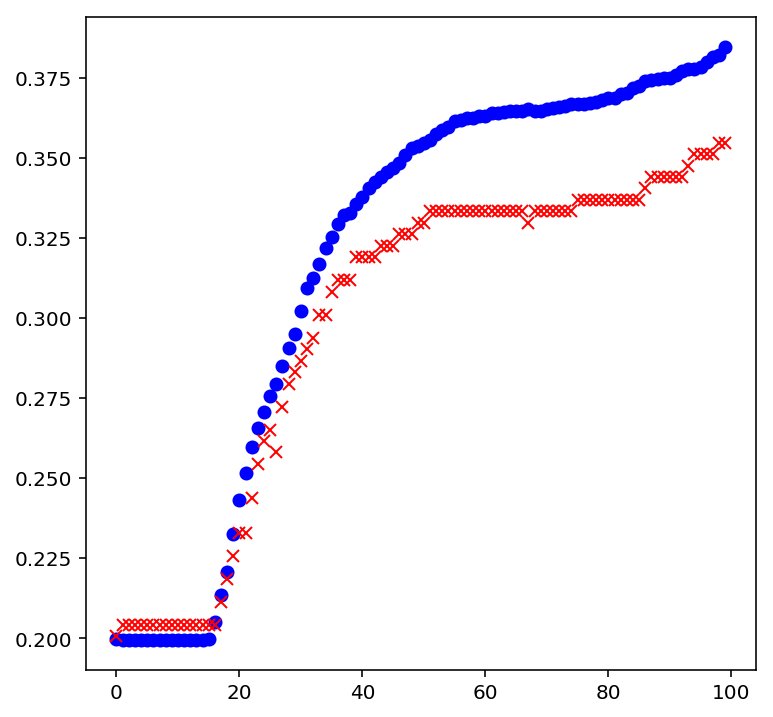

In [25]:
import matplotlib.pyplot as plt
plt.ion()
plt.figure(figsize=(6,6))
plt.plot(train_acc,'bo')
plt.plot(test_acc,'rx')

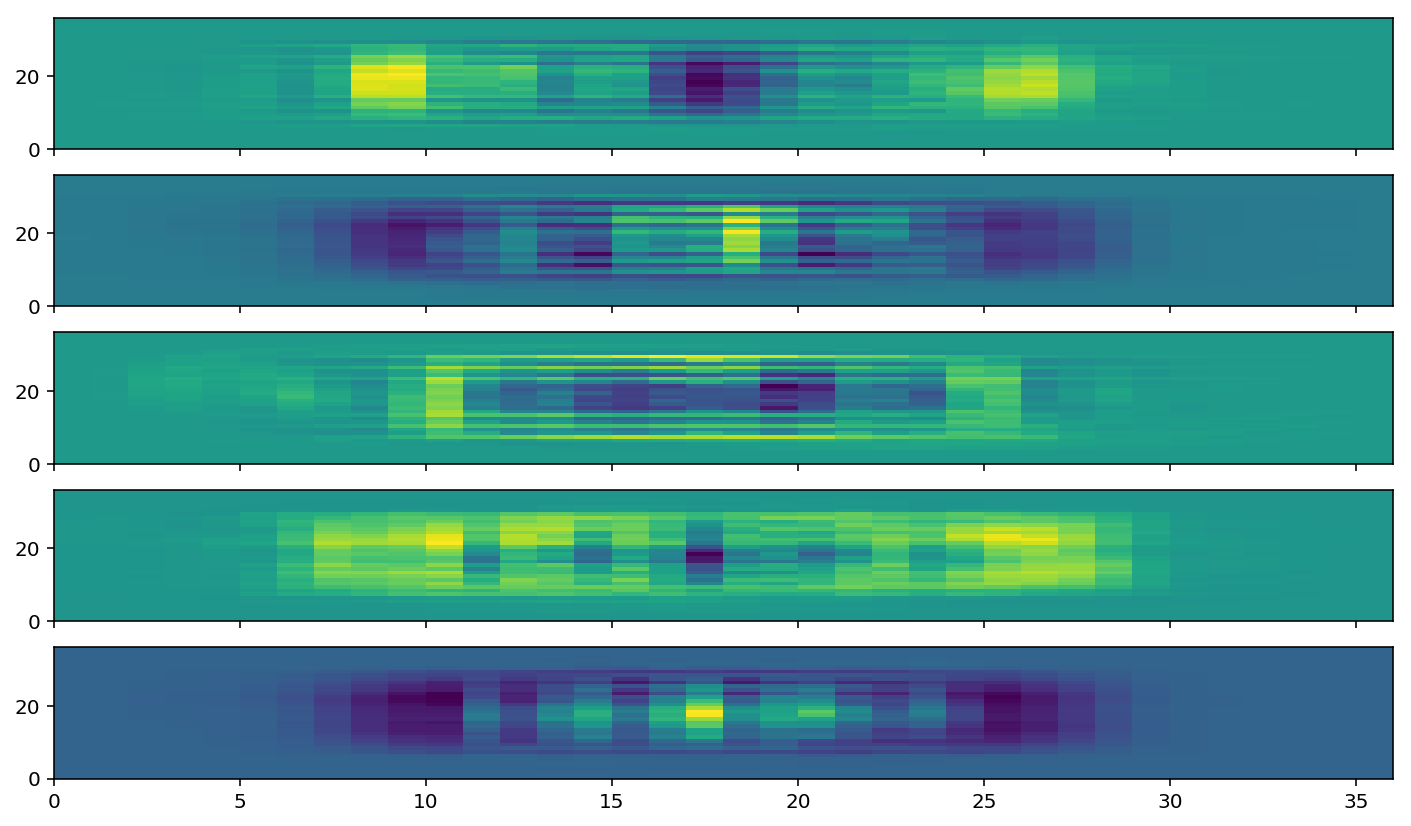

In [26]:
f, plts = plt.subplots(5, sharex=True)
for i in range(5):
    plts[i].pcolor(W.eval()[:,i].reshape([36,36]))